# Task 2 : Generate summary statistics

1. Each route is presented in a single GPX file made up of thousands of data points

These are grouped into stages marked by the <trkseg> tag. 
Use the gpxpy library (https://pypi.org/project/gpxpy/) to load the GPX files into the second notebook. 
    
Approach: Here, I'm writing a function to get points - latitude, longitude, name, description, elevation and creating a dataframe.

In [1]:
import gpxpy
import gpxpy.gpx
import pandas as pd
import requests
import urllib
import urllib.parse as urlparse
import time 

def open_file_dataframe(file_path):
    gpx_file = open(file_path, 'r')
    gpx = gpxpy.parse(gpx_file)
    points=[]
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                dicto = {                                 #Appending values to the dictionary with key being name, description... followed by corresponding values.
                         'name':track.name,
                         'description':track.description,
                         'latitude': point.latitude,
                         'longitude': point.longitude,
                         'elevation': point.elevation
                     }
                points.append(dicto) #appending dictionary to a list.
    df = pd.DataFrame(points)  #Converting list to a dataframe.
    gpx_file.close()
    return df

2. For a given route (say EuroVelo 6) build a dataframe with summary statistics for each stage, i.e. name, length in km, total uphill and downhill. 

Approach: This function mainly uses gpx built in functions to return uphill, downhill and length. Calculated values are stored in a dictionary and then converted to a dataframe.

In [2]:
def open_file(file_path):
    #print(file_path)
    gpx_file = open(file_path, 'r')
    gpx = gpxpy.parse(gpx_file)
    #print(gpx)
    points=[]
    for track in gpx.tracks:
        for segment in track.segments:
            data={}                                  #using the gpx inbuilt functions to calculate values.
            data['name'] = track.name
            data['length'] = segment.length_3d()/1000
            data['uphill'] = segment.get_uphill_downhill().uphill
            data['downhill'] = segment.get_uphill_downhill().downhill
        points.append(data)
    df = pd.DataFrame(points)
    #print(df)
    gpx_file.close()
    return df

In [3]:
import os
directory= '/Users/aditya/Desktop/Sem 1/Data Science/Assignment 2/'
arr = (os.listdir(directory))
arr.remove('.DS_Store')
arr.remove('Untitled.ipynb')
arr.remove('Task 1.ipynb')
arr.remove('.ipynb_checkpoints')
arr
#Printing out all the directories.


['8. Mediterranean Route',
 '13. Iron Curtain Trail',
 '15. Rhine Cycle Route',
 '1. Atlantic Coast Route',
 '17. Rhone Cycle Route',
 '4. Central Europe Route',
 '9. Baltic – Adriatic',
 '3. Pilgrims Route',
 '14. Waters of Central Europe',
 '6. Atlantic – Black Sea',
 'Task 2 and Task 3.ipynb',
 '19. Meuse Cycle Route',
 'MarksData.xlsx',
 '2. Capitals Route',
 '7. Sun Route',
 '10. Baltic Sea Cycle Route',
 '5. Via Romea (Francigena)',
 '11. East Europe Route',
 '12. North Sea Cycle Route']

Here, all the dataframes that are obtained are put into a dictionary so that we can obtain values for any of the routes instantly just by passing the route name as key to the dictionary.

In [80]:
directory = '/Users/aditya/Desktop/Sem 1/Data Science/Assignment 2/'
all_df = {}
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isdir(f):          #checking if its a directory
        for file in os.listdir(f):
            file_dir = os.path.join(f,file)
            if file_dir.endswith('.gpx'):     #checking if file has extension .gpx.
                dataf = open_file(file_dir) #Calling the above function.
                all_df[str(filename)] = dataf       #Creating a dictionary with key being the route name and value being a dataframe.    

In [81]:
all_df

{'8. Mediterranean Route':                                                  name     length  uphill  \
 0        01: Cadiz – Conil de la Frontera (Developed)  52.043537   78.40   
 1   02: Facinas – Estación ffcc San Roque La Linea...  36.757204  403.77   
 2   03: Estación ffcc San Roque La Linea – Estepon...  46.481591  196.90   
 3              04: Malaga – Torre del Mar (Developed)  31.469927    8.01   
 4             05: Castell de Ferro – Adra (Developed)  35.314488  202.21   
 ..                                                ...        ...     ...   
 66            67: Foça – Izmir (Developed with signs)  76.049942  114.64   
 67      68: Izmir – Balikliova (Developed with signs)  76.192050  289.99   
 68    69: Balikliova – Alaçati (Developed with signs)  49.363729  268.54   
 69       70: Alaçati – Sigacik (Developed with signs)  56.955316  318.72   
 70        71: Sigacik – Selcuk (Developed with signs)  79.959989  293.73   
 
     downhill  
 0      66.50  
 1     444.37  


This function is written to seperate name and id from the actual name obtained from gpx.

In [6]:
def create_dataframe(required):
    #print(type(required))
    df=all_df[str(required)]
    print(df)
    df['id'] = df['name'].str.split(':').str[0]
    df['name'] = df['name'].str.split(':').str[1]
    df['name'] = df['name'].str.split('(').str[0]
    return df

Summary statistics for Eurovelo 6

In [7]:
ans_06 = create_dataframe('6. Atlantic – Black Sea')
ans_06   #This is how we can obtain any data pertaining to a route.

                                                 name     length      uphill  \
0   01: Le Pellerin – Saint-Brevin-les-Pins (Devel...  36.223854   17.210000   
1     02: Nantes – Le Pellerin (Developed with signs)  23.220107   63.980000   
2   03: Morlaix Train Station – Saint-Florent-le-V...  51.968061   28.830000   
3   04: Saint-Florent-le-Vieil – Angers (Developed...  50.932534  104.580000   
4          05: Angers – Saumur (Developed with signs)  56.601784  105.330000   
..                                                ...        ...         ...   
88      89: Kovin – Bela Crvka (Developed with signs)  56.289040   43.000000   
89    90: Bela Crvka – Brnjica (Developed with signs)  48.620940   42.100000   
90  91: Brnjica – Doni Milanovac (Developed with s...  43.841593  167.282994   
91  92: Doni Milanovac – Kladovo (Developed with s...  62.199485  197.152008   
92      93: Kladovo – Mokranje (Developed with signs)  86.466064  215.020000   

      downhill  
0    17.410000  
1    

,name,length,uphill,downhill,id
0,Le Pellerin – Saint-Brevin-les-Pins,36.223854,17.210000,17.410000,01
1,Nantes – Le Pellerin,23.220107,63.980000,64.780000,02
2,Morlaix Train Station – Saint-Florent-le-Vieil,51.968061,28.830000,23.030000,03
3,Saint-Florent-le-Vieil – Angers,50.932534,104.580000,70.980000,04
4,Angers – Saumur,56.601784,105.330000,122.730000,05
...,...,...,...,...,...
88,Kovin – Bela Crvka,56.289040,43.000000,24.000000,89
89,Bela Crvka – Brnjica,48.620940,42.100000,67.200000,90
90,Brnjica – Doni Milanovac,43.841593,167.282994,176.052990,91
91,Doni Milanovac – Kladovo,62.199485,197.152008,233.602005,92


3.Write functions to find the longest and hilliest stages in a given route.
1.What is the longest stage in EuroVelo 6?

In [84]:
max_stage = ans_06['length'].max()
max_stage
result = ans_06[ans_06['length'] == max_stage]
print("The longest route is ", result.iloc[0]['name']+"with length ",result.iloc[0]['length'])
result

The longest route is   Tuttlingen – Ulm with length  152.99088706845694


,name,length,uphill,downhill,id
36,Tuttlingen – Ulm,152.990887,293.28,469.68,37


Summary statistics for Eurovelo 1

In [71]:
ans_01 = create_dataframe('1. Atlantic Coast Route')
ans_01 

                                                  name     length  uphill  \
0              001: Nordkapp – Honningsvag (Developed)  30.140299  243.48   
1                002: Honningsvag – Repvag (Developed)  50.802539  177.63   
2                 003: Repvag – Olderfjord (Developed)  44.651227  353.83   
3            004: Olderfjord – Jorehacopma (Developed)  56.410819  432.93   
4                  005: Jorehacopma – Alta (Developed)  52.588302  198.44   
..                                                 ...        ...     ...   
207  208: Praia da Vieira – Figueira da Foz (Develo...  66.803726  151.10   
208  209: Figueira da Foz – Aveiro (Developed with ...  71.099548  132.10   
209  210: Aveiro – Porto / Gaia (Developed with signs)  83.367195   77.37   
210  211: Porto / Gaia – Esposende (Developed with ...  59.210957   51.23   
211    212: Esposende – Caminha (Developed with signs)  49.906304  150.50   

     downhill  
0      525.68  
1      173.03  
2      375.43  
3      144.

,name,length,uphill,downhill,id
0,Nordkapp – Honningsvag,30.140299,243.48,525.68,001
1,Honningsvag – Repvag,50.802539,177.63,173.03,002
2,Repvag – Olderfjord,44.651227,353.83,375.43,003
3,Olderfjord – Jorehacopma,56.410819,432.93,144.83,004
4,Jorehacopma – Alta,52.588302,198.44,463.44,005
...,...,...,...,...,...
207,Praia da Vieira – Figueira da Foz,66.803726,151.10,158.50,208
208,Figueira da Foz – Aveiro,71.099548,132.10,135.50,209
209,Aveiro – Porto / Gaia,83.367195,77.37,75.97,210
210,Porto / Gaia – Esposende,59.210957,51.23,52.33,211


2. What is the stage in EuroVelo 1 with the most uphill?

In [75]:
max_uphill = ans_01['uphill'].max()
result = ans_01[ans_01['uphill'] == max_uphill]
print("The most uphill route is ",result.iloc[0]['name']+"with value",result.iloc[0]['uphill'])
result

The most uphill route is   Kilboghavn – Nesna with value 1026.1000000000001


,name,length,uphill,downhill,id
24,Kilboghavn – Nesna,89.652503,1026.1,1026.4,025


4. A typical requirement in exploring the EuroVelo data would be to find a sequence of flat stages for a short holiday. Write a function to meet this requirement.
What are the three flattest contiguous stages in EuroVelo 2?

Approach: Here, we're basically calculating the rollling mean, and then finding the minimum of it. Then, finding rows with that minimum value.

In [11]:
def three_flattest_stages():
    ans_02 = create_dataframe('2. Capitals Route')
    ans_02 = ans_02.set_index('id')
    ans_02["uphill_avg"] = ans_02.uphill.rolling(3).mean() #rolling mean with argument 3 since we want three contiguous stages.
    minimum = ans_02["uphill_avg"].min()
    ind = ans_02[ans_02['uphill_avg']==minimum].index   #finding the index of the minimum uphill 
    index1 = int(ind[0])
    result = ans_02.iloc[index1 - 3 : index1]  #obtaining three contiguous rows
    result.drop('uphill_avg', inplace=True, axis=1) #dropping this column because this was just needed for calculation purpose.
    return result

In [76]:
result = three_flattest_stages()
print("The three flattest regions are: ")
result

                                                 name      length   uphill  \
0                  01: Athlone – Kinnegad (Developed)   62.560925    68.39   
1                 02: Kinnegad – Maynooth (Developed)   40.248783    10.94   
2                   03: Maynooth – Dublin (Developed)   26.016520     7.91   
3        04: Holyhead – Bangor (Developed with signs)   46.827279   164.99   
4      05: Bangor – Porthmadog (Developed with signs)   97.146697   322.08   
5   06: Porthmadog – Dolgellau (Developed with signs)   48.526805   439.48   
6   07: Dolgellau – Llanidloes (Developed with signs)   58.540193   906.99   
7      08: Llanidloes – Builth (Developed with signs)   48.955678   334.44   
8        09: Builth – Hereford (Developed with signs)   32.713848   106.60   
9   10: Hereford – Abergavenny (Developed with signs)   34.493810   437.07   
10  11: Abergavenny – Chepstow (Developed with signs)   50.993798   405.93   
11      12: Chepstow – Bristol (Developed with signs)   59.73019

/var/folders/nj/b6dw2bwx4l990d0x8h9pc2sh0000gn/T/ipykernel_1434/2586951916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop('uphill_avg', inplace=True, axis=1) #dropping this column because this was just needed for calculation purpose.


,name,length,uphill,downhill
id,,,,
01,Athlone – Kinnegad,62.560925,68.39,38.19
02,Kinnegad – Maynooth,40.248783,10.94,25.84
03,Maynooth – Dublin,26.016520,7.91,63.11


2. Find the five hilliest (most uphill) contiguous stages in EuroVelo 1.

Approach: Just like the above method here we would be calculating rolling mean for 5 contiguous stages, then finding the maximium.


In [78]:
def five_hilliest_stages():  
    ans_01 = create_dataframe('1. Atlantic Coast Route')
    ans_01 = ans_01.set_index('id')
    ans_01["uphill_avg"] = ans_01.uphill.rolling(5).mean()    #finding 5 rolling mean values.
    maximum = ans_01["uphill_avg"].max()
    ind = ans_01[ans_01['uphill_avg']==maximum].index   #index of the maximum values
    index1 = int(ind[0])
    result = ans_01.iloc[index1 - 5 : index1]
    result.drop('uphill_avg', inplace=True, axis=1)
    return result

In [82]:
result = five_hilliest_stages()
print("The five hilliest stages: ")
result

                                                  name     length  uphill  \
0              001: Nordkapp – Honningsvag (Developed)  30.140299  243.48   
1                002: Honningsvag – Repvag (Developed)  50.802539  177.63   
2                 003: Repvag – Olderfjord (Developed)  44.651227  353.83   
3            004: Olderfjord – Jorehacopma (Developed)  56.410819  432.93   
4                  005: Jorehacopma – Alta (Developed)  52.588302  198.44   
..                                                 ...        ...     ...   
207  208: Praia da Vieira – Figueira da Foz (Develo...  66.803726  151.10   
208  209: Figueira da Foz – Aveiro (Developed with ...  71.099548  132.10   
209  210: Aveiro – Porto / Gaia (Developed with signs)  83.367195   77.37   
210  211: Porto / Gaia – Esposende (Developed with ...  59.210957   51.23   
211    212: Esposende – Caminha (Developed with signs)  49.906304  150.50   

     downhill  
0      525.68  
1      173.03  
2      375.43  
3      144.

/var/folders/nj/b6dw2bwx4l990d0x8h9pc2sh0000gn/T/ipykernel_1434/3065912113.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.drop('uphill_avg', inplace=True, axis=1)


,name,length,uphill,downhill
id,,,,
095,Abbeyfeale – Camp,68.987337,166.39,204.19
096,Camp – Annascaul,51.749709,476.75,468.25
097,Annascaul – Glenbeigh,55.262337,151.19,150.99
098,Glenbeigh – Waterville,72.419119,574.55,588.05
099,Waterville – Kenmare,64.110925,731.16,734.76


In [19]:
def create_dataframe_points(required):
    df=all_df_points[str(required)]
    df['id'] = df['name'].str.split(':').str[0]
    df['name'] = df['name'].str.split(':').str[1]
    df['name'] = df['name'].str.split('(').str[0]
    return df

Here, we're creating dataframes for the points and storing them in a dictionary.

In [20]:
directory = '/Users/aditya/Desktop/Sem 1/Data Science/Assignment 2/'
all_df_points = {}
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a directory
    if os.path.isdir(f):
        for file in os.listdir(f):
            file_dir = os.path.join(f,file)
            if file_dir.endswith('.gpx'):
                #print(file_dir)
                dataf = open_file_dataframe(file_dir)
                all_df_points[str(filename)] = dataf   #appending all the values to the dictionary.
all_df_points

{'8. Mediterranean Route':                                               name           description  \
 0     01: Cadiz – Conil de la Frontera (Developed)             Developed   
 1     01: Cadiz – Conil de la Frontera (Developed)             Developed   
 2     01: Cadiz – Conil de la Frontera (Developed)             Developed   
 3     01: Cadiz – Conil de la Frontera (Developed)             Developed   
 4     01: Cadiz – Conil de la Frontera (Developed)             Developed   
 ...                                            ...                   ...   
 5067   71: Sigacik – Selcuk (Developed with signs)  Developed with signs   
 5068   71: Sigacik – Selcuk (Developed with signs)  Developed with signs   
 5069   71: Sigacik – Selcuk (Developed with signs)  Developed with signs   
 5070   71: Sigacik – Selcuk (Developed with signs)  Developed with signs   
 5071   71: Sigacik – Selcuk (Developed with signs)  Developed with signs   
 
        latitude  longitude  elevation  
 0     

# Task 3. Test the accuracy of the distance estimates

Here, I'm creating a chain of latitudes and longitudes seperating both of them by a colon(:). Then, passing these values to the sendRequest function. For few values, the api returns null values, in that case we append Nan.

In [21]:
import numpy as np
def get_dataframe(dataframe):
    final = {
        'length_API': []        #creating a new key to store values from the API.
    }
    ans = dataframe['id'].unique()     #fetching only unique values
    for i in ans:
        data = dataframe[dataframe['id']==i]
        latlon = []
        string = ""
        for index,row in data.iterrows():
            latlon.append(str(row['latitude'])+","+str(row['longitude']))   #making a latitude, longitude pair.
            string = ":".join(latlon)
        try:
            jsonResult = sendRequest(string)    #sending request to the API
            routeSummary = jsonResult['routes'][0]['summary']['lengthInMeters']  #fetching only length from the API result.   
            final['length_API'].append(routeSummary)
        except KeyError:
            final['length_API'].append(np.nan)     
    return pd.DataFrame(final)
           

#final_19 = get_dataframe(df_19)

In [22]:
def sendRequest(latlon):
    url = "https://api.tomtom.com/routing/1/calculateRoute/"+latlon+"/json?travelMode=bicycle&key=GBeZraRgijHze0xluZWcJq5AnfVZsCq4"   #setting travel mode as bicycle.
    response = requests.get(url)
    json_result = response.json()
    time.sleep(5)  #time between api calls.
    return json_result

In [23]:
def get_values_from_api(route):
    ans = create_dataframe(str(route)) #calling function to summary table
    df= create_dataframe_points(str(route))  #calling function to create points table.
    final = get_dataframe(df)
    extract = final['length_API']
    ans.insert(5,"length_API",extract)    #adding values from the API to the dataframe.
    ans['length_API'] = ans['length_API']/1000
    return ans

In [24]:
result_19 = get_values_from_api('19. Meuse Cycle Route')

                                                 name     length  uphill  \
0   01: Langres – Pouilly-en-bassigny (Developed w...  32.963064  183.36   
1   02: Pouilly-en-bassigny – Montigny-le-Roi (Dev...  10.209156    2.75   
2   03: Montigny-le-Roi – Bourmont (Developed with...  27.222500   58.67   
3   04: Bourmont – Neufchâteau (Developed with signs)  29.234196  170.42   
4   05: Neufchâteau – Vaucouleurs (Developed with ...  39.127542   79.84   
5   06: Vaucouleurs – Commercy (Developed with signs)  27.420336   91.17   
6     07: Commercy – St-Mihiel (Developed with signs)  22.580279  130.09   
7   08: St-Mihiel – Verdun memorial (Developed wit...  38.047263   30.99   
8   09: Verdun memorial – Dun-Sur-Meuse (Developed...  41.543988   34.56   
9   10: Dun-Sur-Meuse – Stenay (Developed with signs)  14.850456   14.47   
10          11: Stenay – Sedan (Developed with signs)  43.297073   87.93   
11  12: Sedan – Charleville-Mézières (Developed wi...  28.385211   17.12   
12  13: Char

In [25]:
result_19

,name,length,uphill,downhill,id,length_API
0,Langres – Pouilly-en-bassigny,32.963064,183.36,254.06,01,37.718
1,Pouilly-en-bassigny – Montigny-le-Roi,10.209156,2.75,55.55,02,10.648
2,Montigny-le-Roi – Bourmont,27.222500,58.67,74.37,03,27.943
3,Bourmont – Neufchâteau,29.234196,170.42,209.62,04,30.214
4,Neufchâteau – Vaucouleurs,39.127542,79.84,112.24,05,42.818
5,Vaucouleurs – Commercy,27.420336,91.17,111.77,06,28.359
6,Commercy – St-Mihiel,22.580279,130.09,143.29,07,34.729
7,St-Mihiel – Verdun memorial,38.047263,30.99,60.19,08,46.974
8,Verdun memorial – Dun-Sur-Meuse,41.543988,34.56,47.56,09,59.361
9,Dun-Sur-Meuse – Stenay,14.850456,14.47,22.07,10,15.144


In [26]:
result_14 = get_values_from_api('14. Waters of Central Europe')

                                                name      length  uphill  \
0  1: Zell Am See – St Johann im Pongau (Develope...   40.425506  140.65   
1  2: St Johann im Pongau – Liezen (Developed wit...  112.872059  413.70   
2  3: Liezen – World Heritage Graz (Developed wit...  162.597112  433.20   
3  4: World Heritage Graz – Szentgotthard (Develo...  101.202530  226.02   
4   5: Szentgotthard – Vasvar (Developed with signs)   68.121948  206.22   
5       6: Vasvar – Keszthely (Developed with signs)   65.575842  194.39   
6  7: Keszthely – Balatonfuzfo (Developed with si...   91.289074  153.89   
7   8: Balatonfuzfo – Velence (Developed with signs)   66.781224  163.16   

   downhill  
0    326.95  
1    344.30  
2    722.40  
3    348.12  
4    227.22  
5    270.19  
6    161.59  
7    170.26  


In [27]:
result_14

,name,length,uphill,downhill,id,length_API
0,Zell Am See – St Johann im Pongau,40.425506,140.65,326.95,1,44.663
1,St Johann im Pongau – Liezen,112.872059,413.70,344.30,2,138.776
2,Liezen – World Heritage Graz,162.597112,433.20,722.40,3,NaN
3,World Heritage Graz – Szentgotthard,101.202530,226.02,348.12,4,NaN
4,Szentgotthard – Vasvar,68.121948,206.22,227.22,5,70.782
5,Vasvar – Keszthely,65.575842,194.39,270.19,6,68.204
6,Keszthely – Balatonfuzfo,91.289074,153.89,161.59,7,104.722
7,Balatonfuzfo – Velence,66.781224,163.16,170.26,8,69.447


1. Focusing on some of the shorter routes (e.g. EuroVelo routes 14 and 19), provide an estimate of the error (underestimate) in the gpxpy track lengths obtained using the length_3d method. 

Approach: Here, we're subtracting length_API from length to find the difference between the length.

In [30]:
result_19['difference'] = (result_19['length_API']-result_19['length'])
result_19['% diff'] = (result_19['difference']/result_19['length_API'])*100 #diff percentage calculation
result_19

,name,length,uphill,downhill,id,length_API,difference,% diff
0,Langres – Pouilly-en-bassigny,32.963064,183.36,254.06,01,37.718,4.754936,12.606543
1,Pouilly-en-bassigny – Montigny-le-Roi,10.209156,2.75,55.55,02,10.648,0.438844,4.121376
2,Montigny-le-Roi – Bourmont,27.222500,58.67,74.37,03,27.943,0.720500,2.578462
3,Bourmont – Neufchâteau,29.234196,170.42,209.62,04,30.214,0.979804,3.242880
4,Neufchâteau – Vaucouleurs,39.127542,79.84,112.24,05,42.818,3.690458,8.618941
5,Vaucouleurs – Commercy,27.420336,91.17,111.77,06,28.359,0.938664,3.309934
6,Commercy – St-Mihiel,22.580279,130.09,143.29,07,34.729,12.148721,34.981488
7,St-Mihiel – Verdun memorial,38.047263,30.99,60.19,08,46.974,8.926737,19.003571
8,Verdun memorial – Dun-Sur-Meuse,41.543988,34.56,47.56,09,59.361,17.817012,30.014677
9,Dun-Sur-Meuse – Stenay,14.850456,14.47,22.07,10,15.144,0.293544,1.938349


          length      uphill    downhill  length_API  difference    % diff
count   7.000000    7.000000    7.000000    7.000000    7.000000  7.000000
mean   22.961612   50.702857   70.860000   23.755429    0.793817  3.317691
std    10.945190   62.149171   71.542437   11.386126    0.474061  0.825025
min    10.209156    2.750000    5.630000   10.648000    0.293544  1.938349
25%    13.340488    8.720000   19.540000   13.731000    0.463162  2.910671
50%    27.222500   14.470000   55.550000   27.943000    0.720500  3.309934
75%    28.327266   74.920000   93.070000   29.286500    0.959234  4.016416
max    39.964118  170.420000  209.620000   41.662000    1.697882  4.121376
---------------------------------------------------------------------------------
The standard deviation of the difference is:  0.4740609604936531


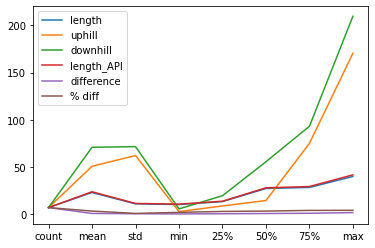

In [85]:
result_19_final = result_19[result_19['% diff']<=5.0] #taking only values where difference is less than 5%
print(result_19_final.describe())
result_19_final.describe().plot()
print("---------------------------------------------------------------------------------")
print("The standard deviation of the difference is: ",result_19_final['difference'].std())

In [45]:
result_14['difference'] = (result_14['length_API']-result_14['length'])
result_14['% diff'] = (result_14['difference']/result_14['length_API'])*100
result_14

,name,length,uphill,downhill,id,length_API,difference,% diff
0,Zell Am See – St Johann im Pongau,40.425506,140.65,326.95,1,44.663,4.237494,9.487705
1,St Johann im Pongau – Liezen,112.872059,413.70,344.30,2,138.776,25.903941,18.666009
2,Liezen – World Heritage Graz,162.597112,433.20,722.40,3,NaN,NaN,NaN
3,World Heritage Graz – Szentgotthard,101.202530,226.02,348.12,4,NaN,NaN,NaN
4,Szentgotthard – Vasvar,68.121948,206.22,227.22,5,70.782,2.660052,3.758091
5,Vasvar – Keszthely,65.575842,194.39,270.19,6,68.204,2.628158,3.853379
6,Keszthely – Balatonfuzfo,91.289074,153.89,161.59,7,104.722,13.432926,12.827224
7,Balatonfuzfo – Velence,66.781224,163.16,170.26,8,69.447,2.665776,3.838576


          length      uphill    downhill  length_API  difference    % diff
count   3.000000    3.000000    3.000000    3.000000    3.000000  3.000000
mean   66.826338  187.923333  222.556667   69.477667    2.651329  3.816682
std     1.273653   22.246443   50.127949    1.289274    0.020269  0.051278
min    65.575842  163.160000  170.260000   68.204000    2.628158  3.758091
25%    66.178533  178.775000  198.740000   68.825500    2.644105  3.798333
50%    66.781224  194.390000  227.220000   69.447000    2.660052  3.838576
75%    67.451586  200.305000  248.705000   70.114500    2.662914  3.845977
max    68.121948  206.220000  270.190000   70.782000    2.665776  3.853379
---------------------------------------------------------------------------------
The standard deviation of the difference is:  0.02026917703216377


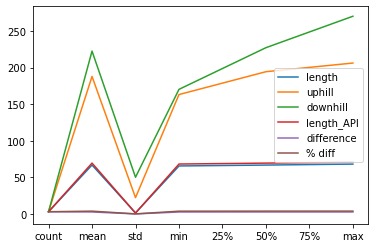

In [86]:
result_14_final = result_14[result_14['% diff']<=5.0]   #taking only values where difference is less than 5%
print(result_14_final.describe())
result_14_final.describe().plot()
print("---------------------------------------------------------------------------------")
print("The standard deviation of the difference is: ",result_14_final['difference'].std())

Plots to show the differences in length calculated using gpx and calculated using API.

<AxesSubplot:>

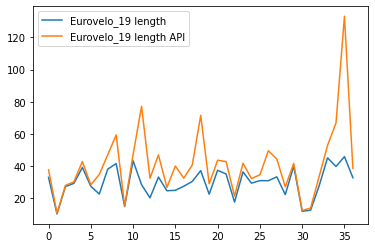

In [42]:
result_plot = pd.DataFrame()
result_plot['Eurovelo_19 length'] = result_19['length']
result_plot['Eurovelo_19 length API'] = result_19['length_API']
result_plot.plot()

<AxesSubplot:>

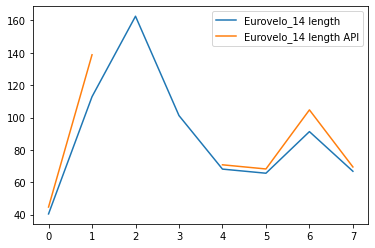

In [43]:
result_plot = pd.DataFrame()
result_plot['Eurovelo_14 length'] = result_14['length']
result_plot['Eurovelo_14 length API'] = result_14['length_API']
result_plot.plot()

2. Discuss the merits of this error estimation, are all the discrepancies on the GPX side?


From the above analysis, the reason why there are discrepencies are as follows:

1. The gpx 3d method uses haversine distance method which is the angular distance between two points on the on the surface of the sphere. It takes latitudes and logitudes to calculate the distance.

2. The API calculates distance based on if there's a path from one point to another. If yes, then that route distance along the road is taken.